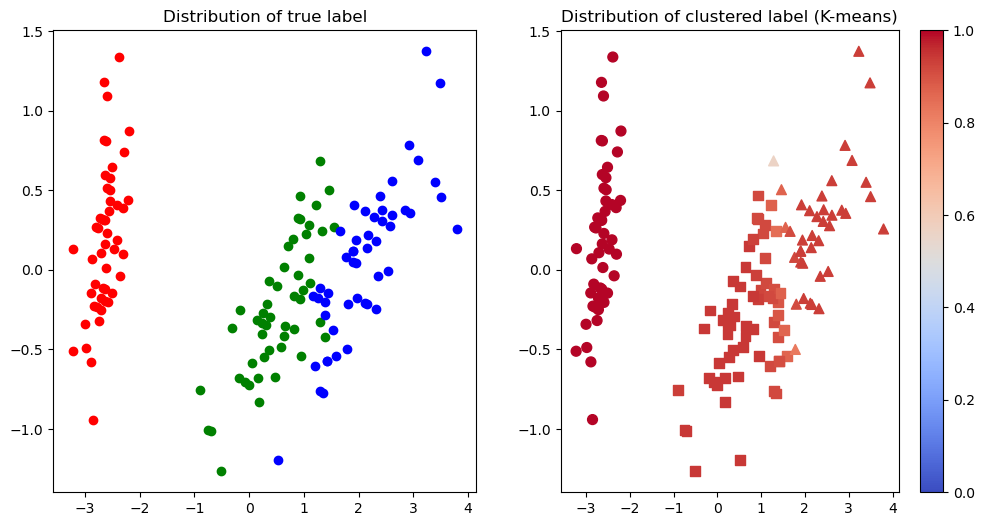

In [1]:
from sklearn.datasets import load_iris
from modules.stability_scheme1 import stability
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
data  = iris.data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)


# Original distribution
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
idx = np.arange(data.shape[0])

idx0 = idx[iris.target == 0]
idx1 = idx[iris.target == 1]
idx2 = idx[iris.target == 2]
plt.scatter(X_pca[idx0, 0], X_pca[idx0, 1], color='r')
plt.scatter(X_pca[idx1, 0], X_pca[idx1, 1], color='g')
plt.scatter(X_pca[idx2, 0], X_pca[idx2, 1], color='b')
plt.title("Distribution of true label")

# Distribution from clustering stability with K-means
ax = fig.add_subplot(122)
idx = np.arange(data.shape[0])

_stability = stability(org_data=X_pca, K=3, B=100)
color_for_stab = _stability.jaccard_stabs[0]
cmap = plt.cm.get_cmap('coolwarm')

idx0 = idx[_stability._orgClustering.labels == 0]
idx1 = idx[_stability._orgClustering.labels == 1]
idx2 = idx[_stability._orgClustering.labels == 2]

markers = ['s', 'o', '^']
for k in range(_stability.K):
    temp_idx = idx[_stability._orgClustering.labels == k]
    temp_scatter = ax.scatter(X_pca[temp_idx, 0], X_pca[temp_idx, 1], marker=markers[k], s=50, c=color_for_stab[temp_idx], cmap=cmap, vmin=0, vmax=1)
    
plt.title("Distribution of clustered label (K-means)")

cbar = plt.colorbar(temp_scatter)

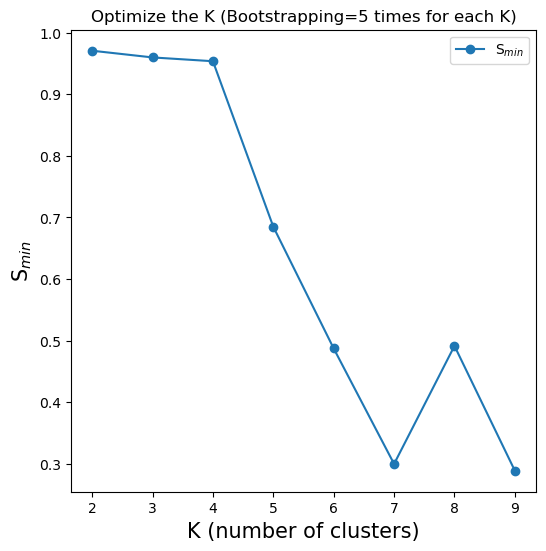

In [2]:
_stability.plot_K_optimization(data=X_pca)